# Assignment 3 




Due by 11:59pm, Apr. 23, 2023

## Theory Questions (Question 1: 5 points, Question 2: 5 points, Question 3: 10 points)

***

1. Suppose I is 5X5 image, K is a filter. Compute the convolution of the image I with K, stride =1.

I:

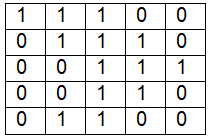

K:

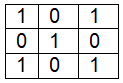

a)With zero padding.

b)Without padding.






**Answer:**

***
A/ with zero padding:

$convolution = \begin{matrix}
2 & 2 & 3 & 1 & 1\\
1 & 4 & 3 & 4 & 1\\
1 & 2 & 4 & 3 & 3\\
1 & 2 & 3 & 4 & 1\\
0 & 2 & 2 & 1 & 1
\end{matrix}
$

B/ without padding:

$convolution = \begin{matrix}
4 & 3 & 4\\
2 & 4 & 3\\
2 & 3 & 4
\end{matrix}
$

2.Let I be the input. Write the output using max pooling with 2X2 filter, stride = 2.

I:
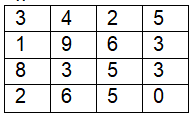




**Answer:**

***
$output = \begin{matrix}
9 & 6\\
8 & 5\\
\end{matrix}
$

3.Let I be the 5X5 RGB image. K is a 3X3 filter having all 1s. 

For the R channel, we have,
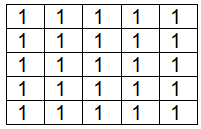

For the G channel, we have,
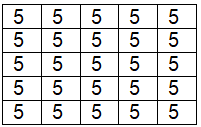

For the B channel, we have,
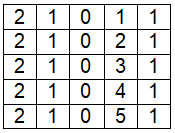

Compute the convolution of I with K, stride = 1, without padding.




**Answer:**

***

For the R Channel:

$R \ convoluted = \begin{matrix}
9 & 9 & 9\\
9 & 9 & 9\\
9 & 9 & 9
\end{matrix}
$

For the G Channel:

$G \ convoluted = \begin{matrix}
45 & 45 & 45\\
45 & 45 & 45\\
45 & 45 & 45
\end{matrix}
$

For the B Channel:

$B \ convoluted = \begin{matrix}
9 & 9 & 9\\
9 & 12 & 12\\
9 & 15 & 15
\end{matrix}
$

## Programming Questions (Question 4: 50 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set. 

(1) Build the sequential classification with several dense layers. Don’t use convolution layers. 

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy.

(2)Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy. Compare to the previous result.



Model: "DenseModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense (Dense)               (None, 28, 28, 5)         10        
                                                                 
 dense_1 (Dense)             (None, 28, 28, 5)         30        
                                                                 
 dense_2 (Dense)             (None, 28, 28, 5)         30        
                                                                 
 dense_3 (Dense)             (None, 28, 28, 5)         30        
                                                                 
 flatten (Flatten)           (None, 3920)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                3

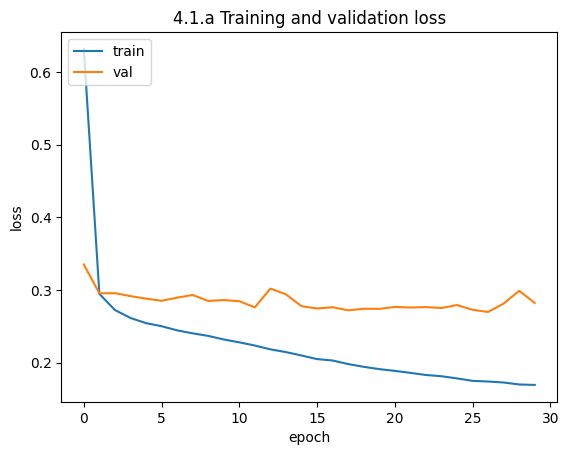

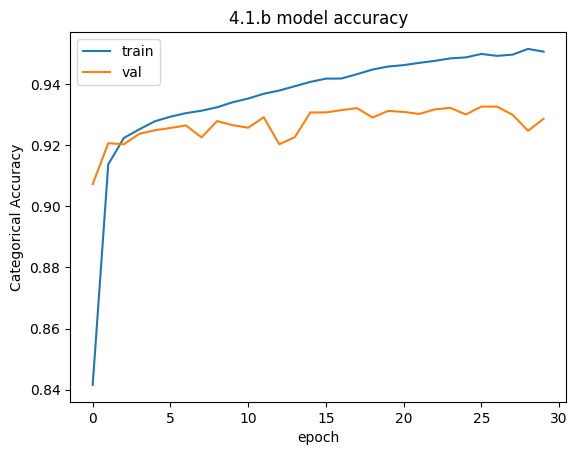

Testing Accuracy: 0.9337000250816345


In [1]:
# importing libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.python.ops.gen_nn_ops import softmax
from tensorflow.python.ops.math_ops import sigmoid

# Load mnist dataset, splitted as training and testing
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x/255
test_x = test_x/255

# Divide test set into test and validation
train_x, validation_x , train_y, validation_y = train_test_split(train_x, train_y, train_size=0.8)

# One-hot encode y values
ohe_train_y = pd.get_dummies(train_y)
ohe_validation_y = pd.get_dummies(validation_y)
ohe_test_y = pd.get_dummies(test_y)

# Change the y values to np arrays
ohe_train_y = ohe_train_y.to_numpy()
ohe_validation_y = ohe_validation_y.to_numpy()
ohe_test_y = ohe_test_y.to_numpy()

# 4.1.a Model 1: several dense layers
x = Input(shape=(28,28,1))
hidden_1 = Dense(5, activation="relu")(x)
hidden_2 = Dense(5, activation="relu")(hidden_1)
hidden_3 = Dense(5, activation="relu")(hidden_2)
hidden_4 = Dense(5, activation="relu")(hidden_3)
hidden_5 = Flatten()(hidden_4)
output = Dense(10, activation = softmax)(hidden_5)

DenseModel = keras.Model(x, output, name="DenseModel")

# summarize the model, compile and fit it
DenseModel.summary()
DenseModel.compile(optimizer="Adam", loss= "categorical_crossentropy", metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=DenseModel.fit(x= train_x, y= ohe_train_y, validation_data = (validation_x, ohe_validation_y), epochs=30, batch_size=128)

# 4.1.b Plot the Accuracy values over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('4.1.a Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 4.1.c Plot the Accuracy values over time
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('4.1.b model accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 4.1.d print the testing accuracy
test_results_dense = {}

test_results_dense['DenseModel'] = DenseModel.evaluate(
    test_x, ohe_test_y, verbose=0)[1]

print("Testing Accuracy:", test_results_dense['DenseModel'])


Model: "ConvModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 10)        410       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 10)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 490)               0 

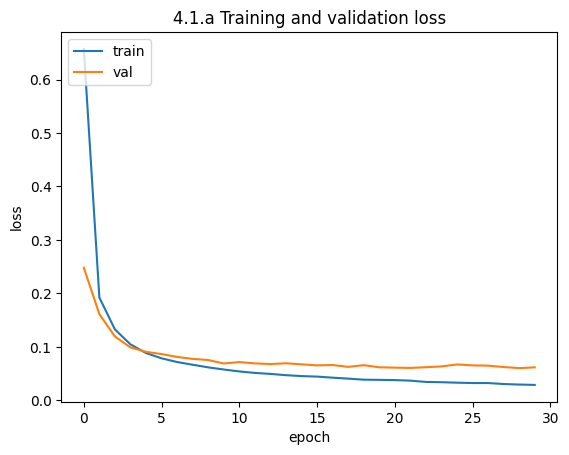

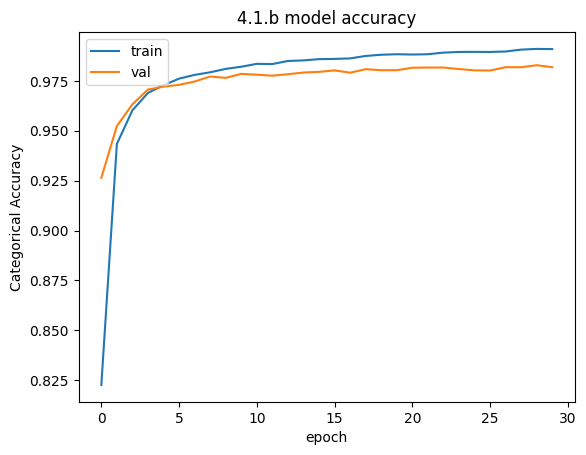

Testing Accuracy: 0.9815000295639038
The CNN model has a testing accuracy of 0.9815000295639038 compared to  0.9337000250816345 of the test model, what means that the CNN model is  3.5837881550883117 times less probable to make a wrong prediction


In [2]:
# importing libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.python.ops.gen_nn_ops import softmax
from tensorflow.python.ops.math_ops import sigmoid

# Load mnist dataset, splitted as training and testing
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Normalize the data
train_x = train_x/255
test_x = test_x/255

# Divide test set into test and validation
train_x, validation_x , train_y, validation_y = train_test_split(train_x, train_y, train_size=0.8)

# One-hot encode y values
ohe_train_y = pd.get_dummies(train_y)
ohe_validation_y = pd.get_dummies(validation_y)
ohe_test_y = pd.get_dummies(test_y)

# Change the y values to np arrays
ohe_train_y = ohe_train_y.to_numpy()
ohe_validation_y = ohe_validation_y.to_numpy()
ohe_test_y = ohe_test_y.to_numpy()

# Model 2: Convolutional layers
x = Input(shape=(28,28,1))
hidden_1 = y = tf.keras.layers.Conv2D( 10, 3,padding="same", activation='relu', input_shape=(28,28,1))(x)
pooling_1 = tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid", data_format=None)(hidden_1)
hidden_2 = y = tf.keras.layers.Conv2D( 10, 2,padding="same", activation='relu', input_shape=(28,28,1))(pooling_1)
pooling_2 = tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid", data_format=None)(hidden_2)
hidden_3 = Flatten()(pooling_2)
output = Dense(10, activation = softmax)(hidden_3)

ConvModel = keras.Model(x, output, name="ConvModel")

# summarize the model, compile and fit it
ConvModel.summary()
ConvModel.compile(optimizer="Adam", loss= "categorical_crossentropy", metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=ConvModel.fit(x= train_x, y= ohe_train_y, validation_data = (validation_x, ohe_validation_y), epochs=30, batch_size=128)

# 4.1.b Plot the Accuracy values over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('4.1.a Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 4.1.c Plot the Accuracy values over time
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('4.1.b model accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 4.1.d print the testing accuracy
test_results_conv = {}

test_results_conv['ConvModel'] = ConvModel.evaluate(
    test_x, ohe_test_y, verbose=0)[1]

print("Testing Accuracy:", test_results_conv['ConvModel'])
print("The CNN model has a testing accuracy of",test_results_conv['ConvModel'], "compared to ",test_results_dense['DenseModel'] ,"of the test model, what means that the CNN model is ",
      (1-test_results_dense['DenseModel'])/(1-test_results_conv['ConvModel']), "times less probable to make a wrong prediction")

313/313 [==============================] - 5s 16ms/step


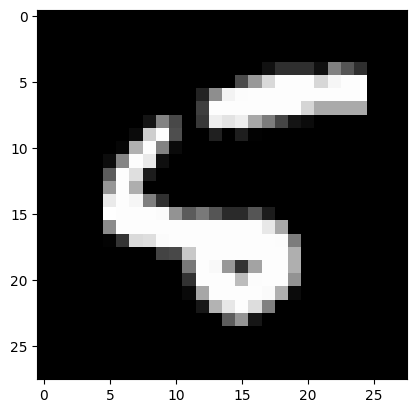

Prediction Dense:  6
Prediction Convolutional:  5
Actual label:  5


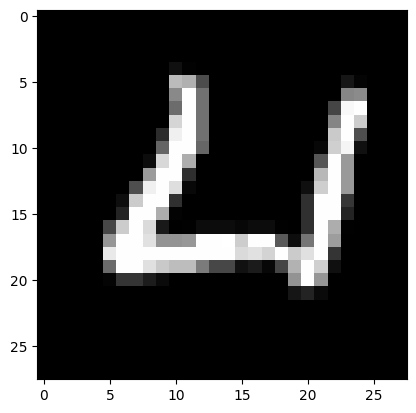

Prediction Dense:  6
Prediction Convolutional:  4
Actual label:  4


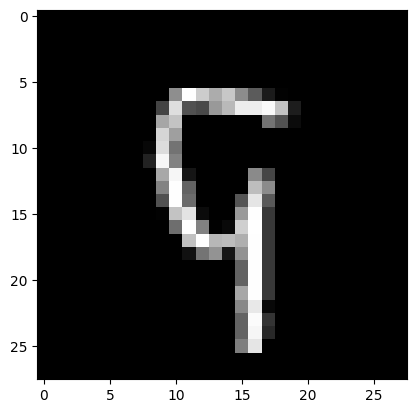

Prediction Dense:  4
Prediction Convolutional:  9
Actual label:  9


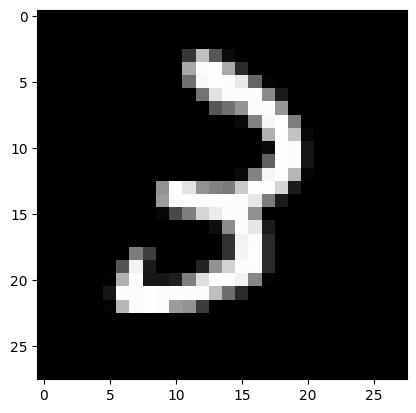

Prediction Dense:  2
Prediction Convolutional:  3
Actual label:  3


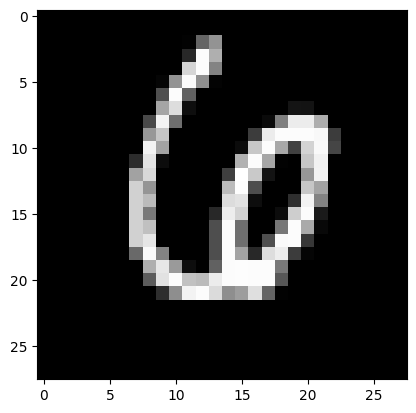

Prediction Dense:  3
Prediction Convolutional:  6
Actual label:  6


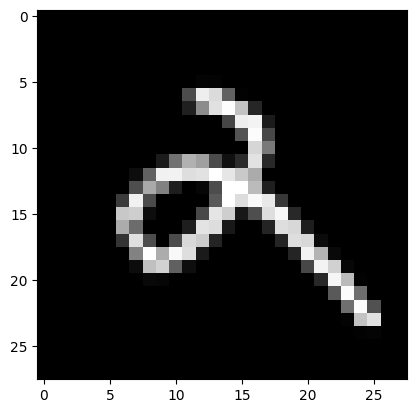

Prediction Dense:  9
Prediction Convolutional:  2
Actual label:  2


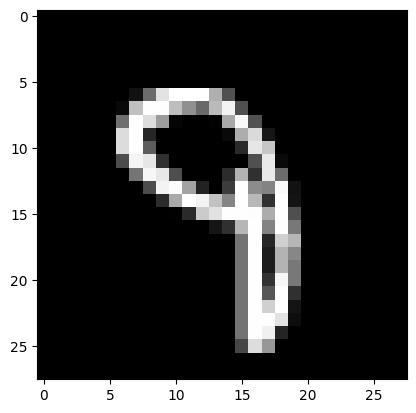

Prediction Dense:  3
Prediction Convolutional:  9
Actual label:  9


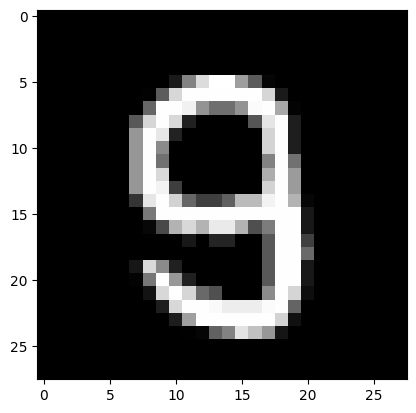

Prediction Dense:  3
Prediction Convolutional:  9
Actual label:  9


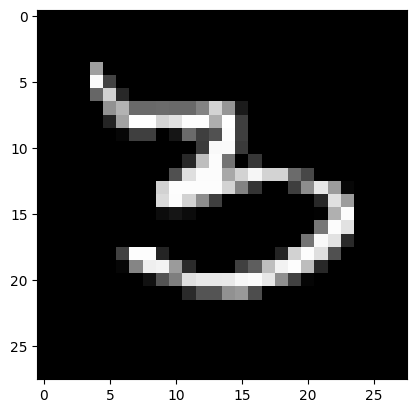

Prediction Dense:  6
Prediction Convolutional:  3
Actual label:  3


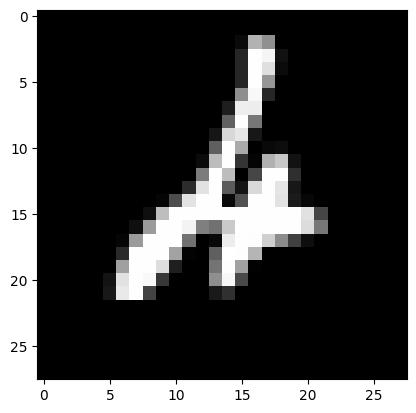

Prediction Dense:  2
Prediction Convolutional:  4
Actual label:  4


In [3]:
# Extra, Finally, we watch the misclassified images from the dense model, and we see the predictions of the two models.

predictions_conv= np.argmax(ConvModel.predict(test_x),axis=1)
predictions_dense= np.argmax(DenseModel.predict(test_x),axis=1)
PredictedRight = predictions_dense == test_y
Misclassified_indexes = np.asarray(np.where(PredictedRight==0))[0]

n_displays=10
for i in range (n_displays):
  n = Misclassified_indexes[i]
  #Print MNIST misclassified Images 
  image = np.array(test_x[n,:,:], dtype='float')
  pixels = image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print('Prediction Dense: ', predictions_dense[n])
  print('Prediction Convolutional: ', predictions_conv[n])
  print('Actual label: ', test_y[n])

5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images. 

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy. 



Model: "CifarModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 30)        1470      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 30)        14430     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1920)              0

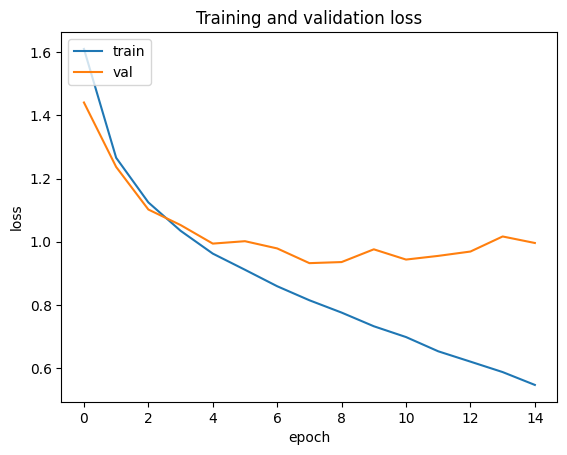

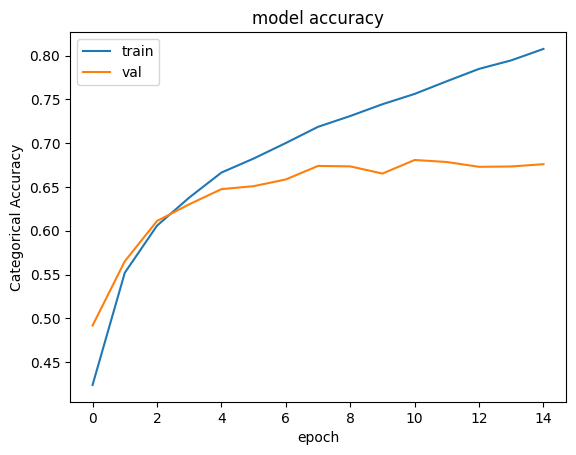

Testing Accuracy: 0.675599992275238


In [6]:
# 5. CNN network for cifar classification
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.model_selection import train_test_split


from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.python.ops.gen_nn_ops import softmax
from tensorflow.python.ops.math_ops import sigmoid
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# Normalize the data
train_x = train_x/255
test_x = test_x/255

# Divide test set into test and validation
train_x, validation_x , train_y, validation_y = train_test_split(train_x, train_y, train_size=0.8)

# One-hot encode y values
ohe_train_y = pd.get_dummies(train_y[:,0])
ohe_validation_y = pd.get_dummies(validation_y[:,0])
ohe_test_y = pd.get_dummies(test_y[:,0])

# Change the y values to np arrays
ohe_train_y = ohe_train_y.to_numpy()
ohe_validation_y = ohe_validation_y.to_numpy()
ohe_test_y = ohe_test_y.to_numpy()

# Model 2: Convolutional layers
x = Input(shape=(32,32,3))
hidden_1 = y = tf.keras.layers.Conv2D( 30, 4,padding="same", activation='relu', input_shape=(32,32,3))(x)
pooling_1 = tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid", data_format=None)(hidden_1)
hidden_2 = y = tf.keras.layers.Conv2D( 30, 4,padding="same", activation='relu', input_shape=(32,32,3))(pooling_1)
pooling_2 = tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid", data_format=None)(hidden_2)
hidden_3 = Flatten()(pooling_2)
hidden_4 = Dense(100, activation = 'relu')(hidden_3)
output = Dense(10, activation = softmax)(hidden_4)

CifarModel = keras.Model(x, output, name="CifarModel")

# summarize the model, compile and fit it
CifarModel.summary()
CifarModel.compile(optimizer="Adam", loss= "categorical_crossentropy", metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=CifarModel.fit(x= train_x, y= ohe_train_y, validation_data = (validation_x, ohe_validation_y), epochs=15, batch_size=128)

# Plot the Accuracy values over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the Accuracy values over time
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 5.b print the testing accuracy
test_results_cifar = {}

test_results_cifar['CifarModel'] = CifarModel.evaluate(
    test_x, ohe_test_y, verbose=0)[1]

print("Testing Accuracy:", test_results_cifar['CifarModel'])

